In [210]:
import pandas as pd

In [211]:
cookies = pd.read_csv("distinct_cookies_update.csv")

In [212]:
cookies

,exp_type,exp_group,exp_index,visit_id,origin_site,host,name,value,is_third_party
0,nyt,c,1,1,webmd,webmd,__cfduid,dd673b2700baa134208e3794c02eec1f41606506583,False
1,nyt,c,1,1,webmd,webmd,lrt_wrk,lrt1_cached_k8_worker_1_37S_21O_2020-11-18_17:...,False
2,nyt,c,1,1,webmd,webmd,gtinfo,"{""ct"":""Columbus"",""c"":""Franklin"",""cc"":""39049"",""...",False
3,nyt,c,1,1,webmd,webmd,VisitorId,9831e05f-086b-4123-5987-f9b5df875967,False
4,nyt,c,1,1,webmd,webmd,__cfduid,dc560e081e9789ea111079dc63ad819771606506583,False
...,...,...,...,...,...,...,...,...,...
27114,washington,t,6,3,washingtonpost,washingtonpost,cto_pub_test_tld,test,False
27115,washington,t,6,3,washingtonpost,pubmatic,SPugT,1607812116,True
27116,washington,t,6,3,washingtonpost,washingtonpost,cto_bundle,vg6d5l9TUW9uR0hzNDlNNWcxU2klMkJGYktxdVRIQkhIb3...,False
27117,washington,t,6,3,washingtonpost,dnacdn,browser_data,zZo57F9TUW9uR0hzNDlNNWcxU2klMkJGYktxdWV1QUthV2...,True


In [223]:
cookies_count = cookies.groupby(['exp_type','exp_group', 'host']).size().reset_index(name='count')
cookies_count

,exp_type,exp_group,host,count
0,forbes,c,1rx,24
1,forbes,c,3lift,14
2,forbes,c,aaxads,6
3,forbes,c,acuityplatform,23
4,forbes,c,addthis,29
...,...,...,...,...
725,washington,t,yieldmo,36
726,washington,t,youtube,12
727,washington,t,zemanta,12
728,washington,t,zendesk,1


In [209]:
# temp = cookies_count[(cookies_count.exp_group == "c") & (cookies_count.exp_type == "nyt")]
# temp = temp.sort_values('count',ascending = False).head(10)

In [215]:
# cookies_count[(cookies_count.exp_group == "c") & (cookies_count.exp_type == "nyt")]\
#     .sort_values('count',ascending = False)\
#     .head(10).plot.bar( x='host', y='count', legend=None)

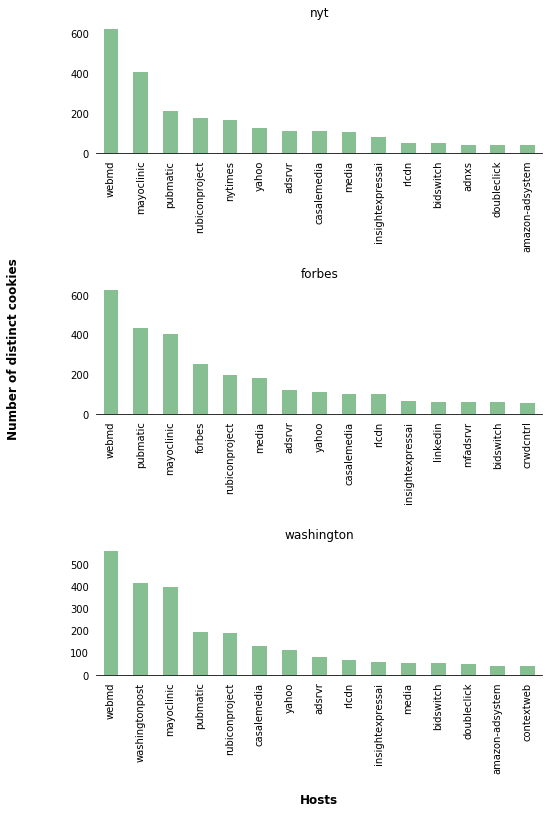

In [214]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12),gridspec_kw={'hspace': 1.0})

sites = ("nyt", "forbes", "washington")
haha = (cookies_count[(cookies_count.exp_group == "c") & (cookies_count.exp_type == "nyt")],
        cookies_count[(cookies_count.exp_group == "c") & (cookies_count.exp_type == "forbes")],
        cookies_count[(cookies_count.exp_group == "c") & (cookies_count.exp_type == "washington")])

for i,x in enumerate(haha):
    x.sort_values('count',ascending = False).head(15)\
        .plot( x='host', y='count', legend=None, ax=axes[i], kind="bar", color='#86bf91')
    
    axes[i].set_title(sites[i])
    
    axes[i].tick_params(bottom=False, top=False, left=False, right=False, labelbottom="on", labelleft="on")
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    
    if i == 0:
        axes[i].xaxis.label.set_visible(False)
        
    if i == 1:
        axes[i].set_ylabel("Number of distinct cookies", labelpad=50, weight='bold', size=12)
        axes[i].xaxis.label.set_visible(False)


    if i == 2:
        axes[i].set_xlabel("Hosts", labelpad=20, weight='bold', size=12)



# ax = temp.plot.bar( x='host', y='count')
# ax.set_title('Simple plot')



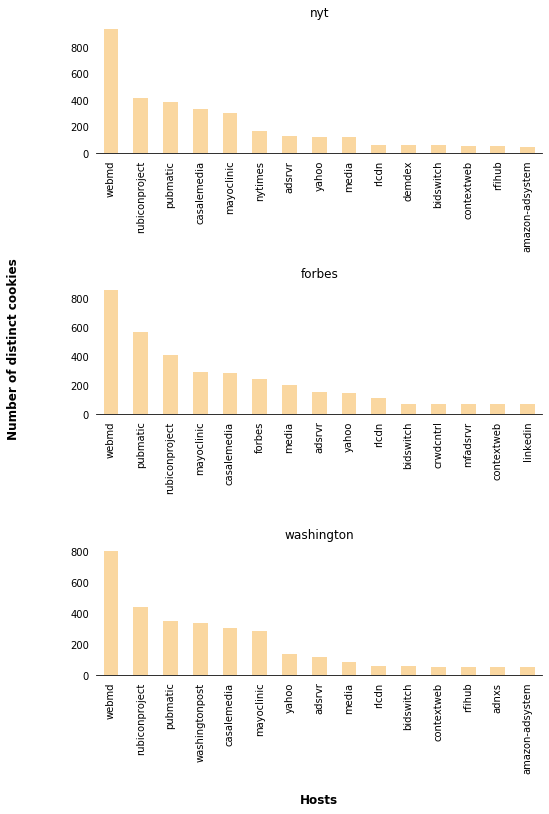

In [216]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12),gridspec_kw={'hspace': 1.0})

sites = ("nyt", "forbes", "washington")
haha = (cookies_count[(cookies_count.exp_group == "t") & (cookies_count.exp_type == "nyt")],
        cookies_count[(cookies_count.exp_group == "t") & (cookies_count.exp_type == "forbes")],
        cookies_count[(cookies_count.exp_group == "t") & (cookies_count.exp_type == "washington")])

for i,x in enumerate(haha):
    x.sort_values('count',ascending = False).head(15)\
        .plot( x='host', y='count', legend=None, ax=axes[i], kind="bar", color='#FAD7A0')
    
    axes[i].set_title(sites[i])
    
    axes[i].tick_params(bottom=False, top=False, left=False, right=False, labelbottom="on", labelleft="on")
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    
    if i == 0:
        axes[i].xaxis.label.set_visible(False)
        
    if i == 1:
        axes[i].set_ylabel("Number of distinct cookies", labelpad=50, weight='bold', size=12)
        axes[i].xaxis.label.set_visible(False)


    if i == 2:
        axes[i].set_xlabel("Hosts", labelpad=20, weight='bold', size=12)



# ax = temp.plot.bar( x='host', y='count')
# ax.set_title('Simple plot')




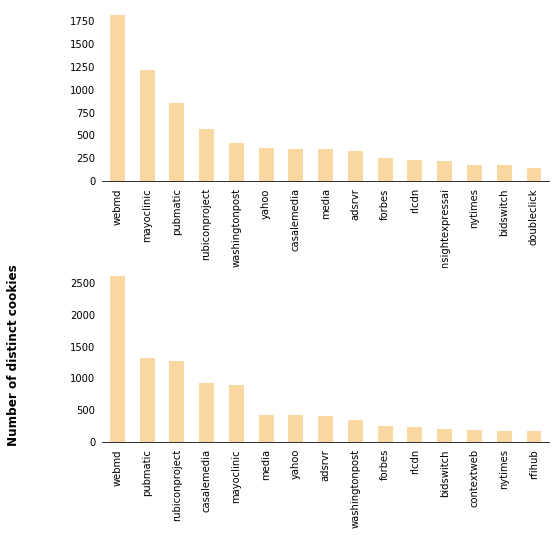

In [227]:
cookies_count_2 = cookies.groupby(['exp_group', 'host']).size().reset_index(name='count')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8),gridspec_kw={'hspace': 0.5})

haha = (cookies_count_2[(cookies_count_2.exp_group == "c")],
        cookies_count_2[(cookies_count_2.exp_group == "t")])

for i,x in enumerate(haha):
    x.sort_values('count',ascending = False).head(15)\
        .plot( x='host', y='count', legend=None, ax=axes[i], kind="bar", color='#FAD7A0')
    
#     axes[i].set_title(sites[i])
    
    axes[i].tick_params(bottom=False, top=False, left=False, right=False, labelbottom="on", labelleft="on")
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    
    if i == 0:
        axes[i].xaxis.label.set_visible(False)
        
    if i == 1:
        axes[i].set_ylabel("Number of distinct cookies", labelpad=50, weight='bold', size=12)
        axes[i].xaxis.label.set_visible(False)


#     if i == 2:
#         axes[i].set_xlabel("Hosts", labelpad=20, weight='bold', size=12)



# ax = temp.plot.bar( x='host', y='count')
# ax.set_title('Simple plot')


In [225]:
cookies_count_2

,exp_group,host,count
0,c,1rx,40
1,c,3lift,49
2,c,aaxads,6
3,c,acuityplatform,38
4,c,addthis,89
...,...,...,...
296,t,yieldmo,104
297,t,youtube,36
298,t,zemanta,41
299,t,zendesk,1


In [70]:
cookies_count[cookies_count.exp_group == "t"]


# cookies_count.to_csv("temp.csv", index=False)



,exp_type,exp_group,host,count
120,forbes,t,1rx,33
121,forbes,t,33across,2
122,forbes,t,360yield,4
123,forbes,t,3lift,39
124,forbes,t,aaxads,6
...,...,...,...,...
725,washington,t,yieldmo,36
726,washington,t,youtube,12
727,washington,t,zemanta,12
728,washington,t,zendesk,1


In [ ]:
cookies_syncing_id_count = cookies_syncing_id.groupby(['exp_group', 'origin_site', 'host']).size().reset_index(name='count')
cookies_syncing_id_count


In [ ]:
# share tp cookie
cookies_syncing_id[cookies_syncing_id.share_tp_cookie].groupby(['exp_group', 'exp_type', 'origin_site']).size()

In [ ]:
cookies_syncing_id[cookies_syncing_id.share_fp_cookie].groupby(['exp_group', 'exp_type', 'origin_site']).size()

In [ ]:
# url contains both
cookies_syncing_id[cookies_syncing_id.share_fp_cookie & cookies_syncing_id.share_tp_cookie].groupby(['exp_group', 'exp_type', 'origin_site']).size()

In [ ]:
len(cookies_syncing_id_count[cookies_syncing_id_count.exp_group=='t'].host.unique())


In [ ]:
len(cookies_syncing_id_count[cookies_syncing_id_count.exp_group=='c'].host.unique())

In [ ]:
cookies_syncing_interest = cookies_syncing[cookies_syncing.origin_site.isin(['nytimes', 'washington', 'forbes'])]

In [ ]:
cookies_syncing.groupby(['exp_group', 'referrer_host', 'origin_site']).size()

In [ ]:
cookies_syncing_interest.groupby(['exp_group', 'referrer_host', 'origin_site']).size()

In [ ]:
cookies_syncing_interest[cookies_syncing_interest.share_tp_cookie].groupby(['exp_group', 'host', 'origin_site']).size()

In [ ]:
cookies_syncing_interest

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


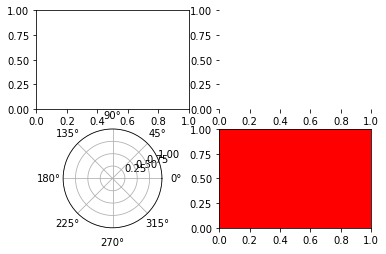

In [119]:
import numpy as np
from matplotlib import pyplot as plt

plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)